# Small Data KS with Normals

In [2]:
using Distributions, Gadfly

INFO: Recompiling stale cache file /Users/vishalgupta/.julia/lib/v0.4/Distributions.ji for module Distributions.
INFO: Recompiling stale cache file /Users/vishalgupta/.julia/lib/v0.4/ArrayViews.ji for module ArrayViews.
INFO: Recompiling stale cache file /Users/vishalgupta/.julia/lib/v0.4/PDMats.ji for module PDMats.
INFO: Recompiling stale cache file /Users/vishalgupta/.julia/lib/v0.4/StatsFuns.ji for module StatsFuns.
INFO: Recompiling stale cache file /Users/vishalgupta/.julia/lib/v0.4/StatsBase.ji for module StatsBase.
INFO: Recompiling stale cache file /Users/vishalgupta/.julia/lib/v0.4/Gadfly.ji for module Gadfly.
INFO: Recompiling stale cache file /Users/vishalgupta/.julia/lib/v0.4/Codecs.ji for module Codecs.
INFO: Recompiling stale cache file /Users/vishalgupta/.julia/lib/v0.4/Colors.ji for module Colors.
INFO: Recompiling stale cache file /Users/vishalgupta/.julia/lib/v0.4/FixedPointNumbers.ji for module FixedPointNumbers.
INFO: Recompiling stale cache file /Users/vishalgupta

In [9]:
include("KPNormal.jl")
using KP

Want to numerically study:
 - Point wise WLLN
 - Stochastic equicontinuity
 

 

In [10]:
# Set up 1: Motivated by the Gaussian Case
n = 1000
tau_grid = linspace(0, 10, 50)
numSims = 1000
taus = 6*rand(n)
cs = rand(n) * 20 / n
out2 = zeros(Float64, numSims, length(tau_grid))
thetas = randn(n) /sqrt(3) 
zstar = KP.ideal_val(thetas, cs)

0.1309921137601363

In [27]:
#Setup 2:  Motivated by odds/evens analysis
n = 1000
tau_grid = linspace(0, 5, 20)
numSims = 1000
thetas = ones(n)
thetas[2:2:n] = .01
taus = ones(n)
taus[2:2:n] = .01
cs = 2 * ones(n) / n
zstar = KP.ideal_val(thetas, cs)


0.4999999999999996

0.8162104599999999

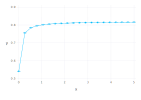

In [28]:
#Asses performance
out = KP.perf_taus(thetas, taus, cs, numSims, tau_grid)
mu = mean(out, 1)'
sig = std(out, 1)' / sqrt(numSims)
println( maximum(mu)/zstar )
plot(x=tau_grid, y=mu/ zstar, ymin = (mu-sig)/zstar, ymax=(mu+sig)/zstar, Geom.point, Geom.line, Geom.errorbar)

In [1]:
#Does increasing n somehow affect jaggedness or can we get directly at testing ULLN


## Compute Bayesian Risk

In [2]:
#pick an interesting set-up
n = 1000
tau_grid = linspace(.1, 10, 30)
numSims = 1000
taus = 6*rand(n)
cs = rand(n) * 20 / n
out = zeros(Float64, numSims, length(tau_grid))

for iSim = 1:numSims
    thetas = randn(n) /sqrt(3) 
    Xs = randn(n) ./ sqrt(taus) + thetas
    for (jx, t) in enumerate(tau_grid)
        rs = KP.shrink(Xs, taus, t)
        out[iSim, jx] = dot(thetas, KP.x(cs, rs))/n
    end
end
mu = mean(out, 1)'
sig = std(out, 1)'/sqrt(numSims)

plot(x=tau_grid, y=mu, ymin = (mu-sig), ymax=(mu+sig), Geom.point, Geom.line, Geom.errorbar)

LoadError: LoadError: UndefVarError: plot not defined
while loading In[2], in expression starting on line 21

## Number of Crossings

In [4]:
n_grid = collect(500:250:5000)
taus = 6*rand(maximum(n_grid))
thetas = randn(maximum(n_grid)) /sqrt(3) 
cs = rand(maximum(n_grid)) * 20 / n

out = zeros(Float64, length(n_grid))
for (ix, n) in enumerate(n_grid)
    qb = KP.qbar(thetas[1:n], taus[1:n], cs[1:n], 10000, 3.)
    out[ix] = dot(qb, thetas[1:n])/n
end
plot(x=n_grid, y=out, Geom.point, Geom.line)

LoadError: LoadError: UndefVarError: plot not defined
while loading In[4], in expression starting on line 11

In [126]:
n = 10000
taus = 6*rand(n)
taus = max(taus, .1)
cs = rand(n) * 20 / n
cs = max(cs, .1/n)
thetas = randn(n) /sqrt(3) 
thetas = min(thetas, 5/sqrt(3))
thetas = max(thetas, -5/sqrt(3))
Xs = randn(n) ./ sqrt(taus) + thetas;

In [127]:
#not a good implementaiton.  takes forever to run.
#KP.ULLN(thetas, taus, cs, Xs, 100)

LoadError: LoadError: InterruptException:
while loading In[127], in expression starting on line 1

## The $\tau_0$-Curve

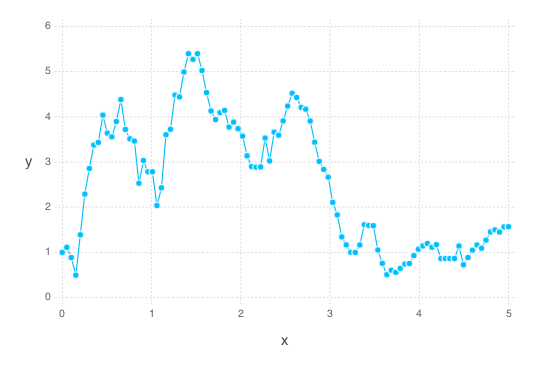

In [118]:
# Set up 1: Motivated by the Gaussian Case
n = 10000
taus = 6*rand(n)
cs = rand(n) * 20 / n           # cost for each project
thetas = 0.01 * randn(n)      # expected reward for each project
zstar = KP.ideal_val(thetas, cs) # Ideal knapsack solution Z* = max\{ (1/n) sum theta_i q_i :  (1/n) sum c_i q_i <= 1 \}

tau0_grid = linspace(0, 5, 100)
out = KP.perf_taus(thetas, taus, cs, 1, tau0_grid)  
# Compute \sum_i \theta_i q_i(\tau, X) for \tau from 0 to infty.  The plot shows that \tau^{OR} is away from zero

plot(x=tau0_grid, y=out/out[1], Geom.point, Geom.line)

# Ideas
# 1) Generate correlated thetas
# 2) This only computes \theta^{OR}.  What happen to \theta^{ARE}?  Do we really need sample splitting?

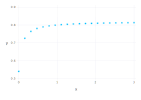

In [52]:
theta1 = 1
theta2 = .01
@assert theta1 > theta2 "thetas must be ordered"
tau1 = 1
tau2 = .01

cumnorm(t)= .5 + .5*erf(t/sqrt(2))
median(s) = (theta1*tau1*sqrt(tau2) + theta2*tau2*sqrt(tau1)) / (sqrt(tau1) + sqrt(tau2))/ ( s + sqrt(tau1*tau2))

function prob(s) 
    prob = -theta2*tau2*(s + tau1) + theta1*tau1*(s+tau2)
    prob /= (sqrt(tau1)+sqrt(tau2))*(s+sqrt(tau1*tau2))
    prob = cumnorm(prob)    
end

f(s) = theta2/2 + (theta1 - theta2)/2 * prob(s)


s_grid = linspace(0, 3, 20)
# #outs = map(s->median(s)/ tau1 * (tau1 + s), s_grid)
outs = map(f, s_grid )
#outs = map(prob, s_grid)
plot(x=s_grid, y=outs / zstar)



In [8]:
f(1), f(0)

(-0.30701799051393097,-0.30701799051393097)